# Hidden Markov Models
Given a sequence of moods, we find the most likely sequence of types of weathers that caused that sequence of moods.

In [81]:
from numpy import random
from IPython.display import Image
import numpy as np

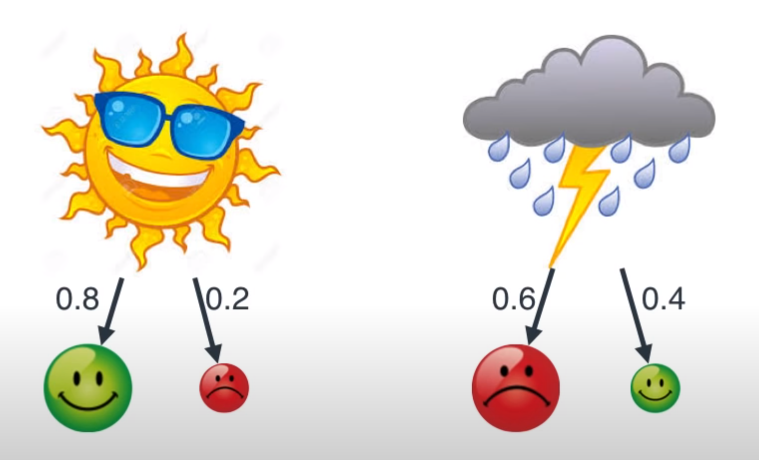

In [92]:
Image(filename='pictures/HMM/hmm1.png')

In [82]:
# Transition Probabilities
p_sunny_sunny = 0.8
p_sunny_rainy = 0.2
p_rainy_sunny = 0.4
p_rainy_rainy = 0.6

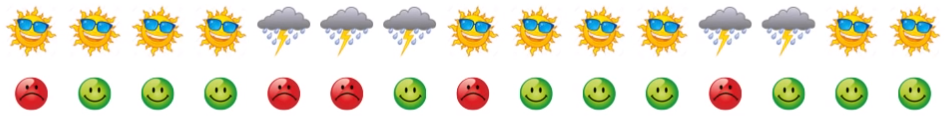

In [95]:
Image(filename='pictures/HMM/hmm2.png')

given above data, we have 10 sunny days and 5  rainy days


In [96]:
# Initial Probabilities
p_sunny = 2/3
p_rainy = 1/3

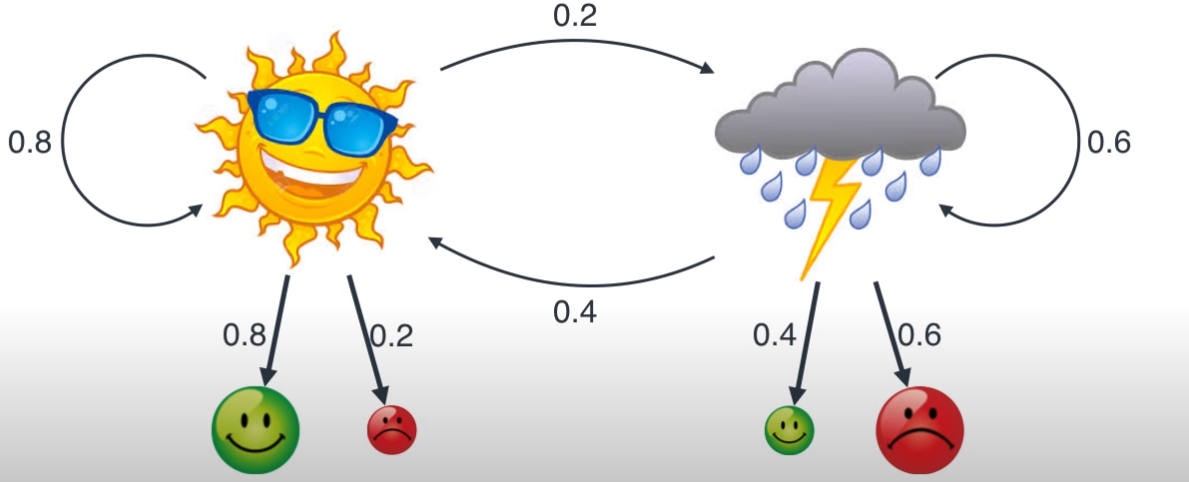

In [97]:
Image(filename='pictures/HMM/hmm3.png')

### Above is a hidden markov model

we only see the moods(observations) and not the weather(hidden state)

In [84]:
# Emission Probabilities
p_sunny_happy = 0.8
p_sunny_grumpy = 0.2
p_rainy_happy = 0.4
p_rainy_grumpy = 0.6

In [85]:
# given the observables:
moods = ['Happy', 'Happy', 'Grumpy', 'Grumpy', 'Grumpy', 'Happy']

In [86]:
probabilities = []
weather = []

if moods[0] == 'Happy':
    probabilities.append((p_sunny*p_sunny_happy, p_rainy*p_rainy_happy))
else:
    probabilities.append((p_sunny*p_sunny_grumpy, p_rainy*p_rainy_grumpy))

print("sunny prabability: ", round(probabilities[0][0], 3))
print("rainy prabability: ", round(probabilities[0][1], 3))

sunny prabability:  0.533
rainy prabability:  0.133


In [87]:
# iterate through the moods to deduce the best probablity of each  
for i in range(1,len(moods)):
    yesterday_sunny, yesterday_rainy = probabilities[-1]
    
    if moods[i] == 'Happy':
        today_sunny = max(yesterday_sunny*p_sunny_sunny*p_sunny_happy, yesterday_rainy*p_rainy_sunny*p_sunny_happy)
        today_rainy = max(yesterday_sunny*p_sunny_rainy*p_rainy_happy, yesterday_rainy*p_rainy_rainy*p_rainy_happy)
        probabilities.append((today_sunny, today_rainy))
        
    else:
        today_sunny = max(yesterday_sunny*p_sunny_sunny*p_sunny_grumpy, yesterday_rainy*p_rainy_sunny*p_sunny_grumpy)
        today_rainy = max(yesterday_sunny*p_sunny_rainy*p_rainy_grumpy, yesterday_rainy*p_rainy_rainy*p_rainy_grumpy)
        probabilities.append((today_sunny, today_rainy))

probabilities

array([[0.533, 0.133],
       [0.341, 0.043],
       [0.055, 0.041],
       [0.009, 0.015],
       [0.001, 0.005],
       [0.002, 0.001]])

In [88]:
np.round(probabilities, 3)

[(0.5333333333333333, 0.13333333333333333),
 (0.3413333333333334, 0.04266666666666667),
 (0.05461333333333335, 0.04096000000000001),
 (0.008738133333333337, 0.014745600000000001),
 (0.0013981013333333341, 0.005308416),
 (0.00169869312, 0.00127401984)]

#### The Viterbi Algorithm 

In [89]:
# compare the prabability list, and only keep the most probable
for p in probabilities:
    if p[0] > p[1]:
        weather.append('Sunny')
    else:
        weather.append('Rainy')

weather

['Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny']